In [1]:
#nous commençons par importer les librairies python dont nous aurons besoin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#nous importons les documents excel que nous allons travailler
population = pd.read_csv('population.csv')
sous_nutrition = pd.read_csv("sous_nutrition.csv")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")

In [3]:
#Pour répondre à la première question, nous utiliserons les dataframes "population" et "sous_nutrition"

##transformation infos du dataframe "population"
###multiplier la colonne par 1000 
population['Valeur'] *= 1000
###Renommer la colonne par "population"
population.rename(columns={"Valeur": "Population"}, inplace=True)

In [4]:
##Transformation du dataframe "sous_nutrition"
###Attribuer des valeurs numériques à la colonne "valeur"
####Ajouter des 0 dans les emplacements vides
sous_nutrition.loc[sous_nutrition["Valeur"].isna(), "Valeur"]=0
####convertir la colonne en valeurs numériques
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition["Valeur"] *= 1000000

In [6]:
#Nous récupérons dans le dataframe "sous_nutrition" les données pour l'année 2017, le tout stocké dans un nouveau dataframe
sous_nutrition_afficher = sous_nutrition[sous_nutrition["Année"] == "2016-2018"]
#Pareillement pour le dataframe "population"                                         
population_2017 = population[population["Année"] == 2017]                                         

In [7]:
#nous créons un nouveau dataframe pour y retrouver toutes les informations nécessaires des dataframes précédents
nouveau_tableau = pd.merge(population_2017, sous_nutrition_afficher, on='Zone')
#nous créons une nouvelle colonne "ratio_sous_nutri" qui affichera le pourcentage de la population sous-nutris pour chaque pays
nouveau_tableau["ratio_sous_nutri"] = (nouveau_tableau["Valeur"]/nouveau_tableau["Population"])*100
#nous calculons le pourcentage mondial de la population sous-nutris
sous_nutri_mondial = (nouveau_tableau["Valeur"].sum()/nouveau_tableau["Population"].sum())*100
print("le taux de sous-nutrition dans le monde est de :",round(sous_nutri_mondial, 3), "%")

le taux de sous-nutrition dans le monde est de : 7.101 %


In [8]:
#Pour répondre à la deuxième question, nous utiliserons les dataframes "population" et "dispo_alimentaire"

In [9]:
#Nous commençons par afficher dans un nouveau dataframe la somme pour chaque pays de sa disponibilité alimentaire
dispo_alimentaire_population_par_pays = dispo_alimentaire.groupby("Zone").sum()
#dans un nouveau dataframe, nous récupérons les colonnes que nous utiliserons
dispo_alimentaire_pays_population = pd.merge(population_2017, dispo_alimentaire_population_par_pays, on='Zone')

C:\Users\Thomas\AppData\Local\Temp\ipykernel_3568\1469870144.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_alimentaire_population_par_pays = dispo_alimentaire.groupby("Zone").sum()


In [10]:
#nous calculons la population mondiale
population_mondiale = dispo_alimentaire_pays_population["Population"].sum()
#nous calculons le besoin théorique de la population mondiale (avec une moyenne de 2500 kcal/jour/personne)
besoin_nourriture_mondial = population_mondiale*2500
#nous calculons la disponibilité réelle en nourriture de la population mondiale (celui de la dataframe "dispo_alimentaire")
disponibilite_nourriture_reel = (dispo_alimentaire_pays_population["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_alimentaire_pays_population["Population"]).sum()
#enfin, nous calculons le pourcentage de la population pouvant etre nourris avec la disponibilité réelle en nourriture
pourcentage_population_pouvant_etre_nourri =(disponibilite_nourriture_reel/besoin_nourriture_mondial)*100
print("le pourcentage de population pouvant etre nourris est :" , pourcentage_population_pouvant_etre_nourri, "%")

le pourcentage de population pouvant etre nourris est : 114.75188769033767 %


In [13]:
#pour le nombre de personnes pouvant etre nourris correctement 
Nb_personnes_nourri = (population_mondiale *pourcentage_population_pouvant_etre_nourri)/100
print("le nombre de personnes théoriques pouvant etre nourris est : ",Nb_personnes_nourri, "personnes" )

le nombre de personnes théoriques pouvant etre nourris est :  8367593850.9324 personnes


In [11]:
#Nous constatons qu'avec toute la nourriture produite dans le monde, nous pourrions nourrir plus de 114% de la population.

In [12]:
#Pour la troisième question, nous faisons approximativement la meme chose

In [14]:
#nous créons un nouveau dataframe qui contiendra la disponibilité alimentaire par pays qu'avec du végétal
dispo_alimentaire_population_par_pays_vegetal = (dispo_alimentaire.loc[dispo_alimentaire["Origine"] == "vegetale"].groupby("Zone")).sum()
#un nouveau dataframe contiendra les valeurs des différents documents que nous utiliserons
dispo_alimentaire_pays_vegetal_population = pd.merge(population_2017, dispo_alimentaire_population_par_pays_vegetal, on='Zone')

C:\Users\Thomas\AppData\Local\Temp\ipykernel_3568\803100634.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_alimentaire_population_par_pays_vegetal = (dispo_alimentaire.loc[dispo_alimentaire["Origine"] == "vegetale"].groupby("Zone")).sum()


In [15]:
#nous calculons la disponibilité réelle en nourriture végétale pour la population mondiale
disponibilite_nourriture_vegetal_reel = (dispo_alimentaire_pays_vegetal_population["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_alimentaire_pays_vegetal_population["Population"]).sum()
print("la réelle disponibilité en nourriture au niveau mondial est", disponibilite_nourriture_vegetal_reel, "kcal/jour")
#nous calculons le nombre de personnes pouvant etre nourris par du végétal 
nb_personnes_nourri_vegetal = (disponibilite_nourriture_vegetal_reel/besoin_nourriture_mondial)*population_mondiale
print("le nombre de personnes pouvant etre nourri correctement par du végétal est :", nb_personnes_nourri_vegetal, "personnes")
#enfin, nous déduisons le pourcentage de la population mondiale pouvant etre nourris qu'avec du végétal
ratio_nb_personnes_nourri_vegetal = (nb_personnes_nourri_vegetal / population_mondiale)*100
print("pourcentage de la population nourri par végétal est :", ratio_nb_personnes_nourri_vegetal, "%")

la réelle disponibilité en nourriture au niveau mondial est 17260764211501.0 kcal/jour
le nombre de personnes pouvant etre nourri correctement par du végétal est : 6904305684.6004 personnes
pourcentage de la population nourri par végétal est : 94.68458013300216 %


In [16]:
#Nous constatons que nous pourrions presque nourrir toute la population mondiale rien qu'avec le végétal

In [17]:
#Pour répondre à la quatrième question, nous utiliserons le dataframe "dispo_alimentaire"

In [19]:
#nous commençons par calculer la disponibilité intérieur totale pour la population mondiale
disponibilite_interieur_total = dispo_alimentaire["Disponibilité intérieure"].sum()
#La formule permettant d'obtenir la part de la perte, de la nourriture utilisés pour les animaux et pour l'alimentation humaine est :
#Production + Importations – Exportations + Variation de stock = Disponibilité intérieure = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

#nous calculons la part la perte total mondiale par rapport à la disponibilité intérieur totale
total_perte = dispo_alimentaire["Pertes"].sum()
print("proportion perte : ", (total_perte/disponibilite_interieur_total)*100 , "%")

#nous faisons de meme pour la nourriture donnée aux animaux
aliments_animaux_total = dispo_alimentaire["Aliments pour animaux"].sum()
print("proportion aliments pour animaux : ", (aliments_animaux_total/disponibilite_interieur_total)*100, "%")

#nourriture pour les humains
total_alimentaion_humaine = dispo_alimentaire["Nourriture"].sum()
print("proportion aliments pour humains : ", (total_alimentaion_humaine/disponibilite_interieur_total)*100, "%")

proportion perte :  4.606541541196999 %
proportion aliments pour animaux :  13.242418464261426 %
proportion aliments pour humains :  49.51021393657058 %


In [20]:
#afin de présenter ces résultats de façons plus lisibles, nous allons créer un diagramme "camembert" afin de voir la répartition de tous les éléments sur la disponibilité mondiale

#nous commençons par calculer le pourcentage des éléments restants ("semence", "traitement", "autres utilisations")
semence_total = dispo_alimentaire["Semences"].sum() 
print("proportion aliments pour semance : ", (semence_total/disponibilite_interieur_total)*100, "%")

traitement_total = dispo_alimentaire["Traitement"].sum()
print("proportion pour traitement : ", (traitement_total/disponibilite_interieur_total)*100, "%")

autres_utilisations_total = dispo_alimentaire["Autres Utilisations"].sum()
print("proportion pour les autres utilisations : ", (autres_utilisations_total/disponibilite_interieur_total)*100, "%")

proportion aliments pour semance :  1.5705258831511117 %
proportion pour traitement :  22.384895350733284 %
proportion pour les autres utilisations :  8.782856401374598 %


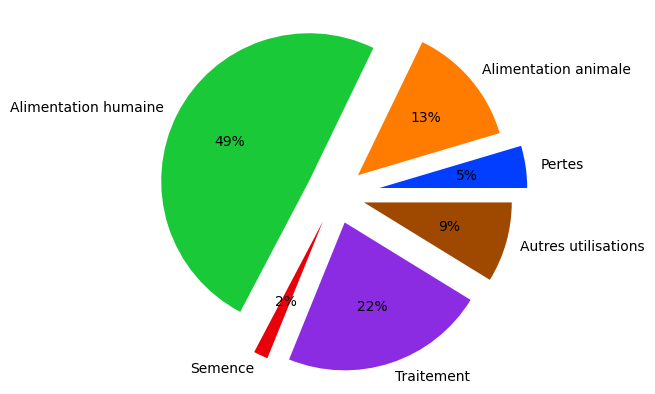

In [21]:
#nous créons maintenant notre camembert avec les librairies "matplotlib" et "seaborn"

data = [(total_perte/disponibilite_interieur_total)*100 , 
        (aliments_animaux_total/disponibilite_interieur_total)*100,
       (total_alimentaion_humaine/disponibilite_interieur_total)*100,
       (semence_total/disponibilite_interieur_total)*100,
       (traitement_total/disponibilite_interieur_total)*100,
       (autres_utilisations_total/disponibilite_interieur_total)*100]

explode = [0.3,0.2,0.2,0.2,0.2,0.2]
labels = ['Pertes', 'Alimentation animale', 'Alimentation humaine', 'Semence', 'Traitement', 'Autres utilisations']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

In [25]:
#Pour la deuxième partie de ce projet, nous travaillerons avec les dataframes déja utilisées afin de trier les données pour faire ressortir ce qui est attendu

##pays pour lesquels la proportion de personnes sous-nutris est la plus élevée (nous prendrons les 10 premiers)
tableau_detail_premier = nouveau_tableau.sort_values(by=['ratio_sous_nutri'], ascending=False)
tableau_detail_premier.head(10)

,Zone,Année_x,Population,Année_y,Valeur,ratio_sous_nutri
78,Haïti,2017,10982366.0,2016-2018,5300000.0,48.259182
157,République populaire démocratique de Corée,2017,25429825.0,2016-2018,12000000.0,47.188685
108,Madagascar,2017,25570512.0,2016-2018,10500000.0,41.062924
103,Libéria,2017,4702226.0,2016-2018,1800000.0,38.279742
100,Lesotho,2017,2091534.0,2016-2018,800000.0,38.249438
183,Tchad,2017,15016753.0,2016-2018,5700000.0,37.957606
161,Rwanda,2017,11980961.0,2016-2018,4200000.0,35.055619
121,Mozambique,2017,28649018.0,2016-2018,9400000.0,32.810898
186,Timor-Leste,2017,1243258.0,2016-2018,400000.0,32.173531
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,28.928718


In [26]:
#Pour les pays ayant reçu le plus d'aides à l'alimentation depuis 2013
aide_alimentaire_population_par_pays = aide_alimentaire.groupby("Pays bénéficiaire").sum()
tableau_aide_alimentaire_population_par_pays = aide_alimentaire_population_par_pays.sort_values(by=['Valeur'], ascending=False)
tableau_aide_alimentaire_population_par_pays.head(10)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_3568\2263045082.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aide_alimentaire_population_par_pays = aide_alimentaire.groupby("Pays bénéficiaire").sum()


,Année,Valeur
Pays bénéficiaire,,
République arabe syrienne,76543,1858943
Éthiopie,66460,1381294
Yémen,76553,1206484
Soudan du Sud,44309,695248
Soudan,48335,669784
Kenya,54376,552836
Bangladesh,50347,348188
Somalie,54377,292678
République démocratique du Congo,50350,288502


In [27]:
#les 10 pays ayant le plus de disponibilité alimentaire 
tableau_dispo_par_habitants = dispo_alimentaire_pays_population.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=False)
tableau_dispo_par_habitants.head(10)

,Zone,Année,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11,Autriche,2017,8819901.0,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
17,Belgique,2017,11419748.0,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
163,Turquie,2017,81116450.0,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
54,États-Unis d'Amérique,2017,325084756.0,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
80,Israël,2017,8243848.0,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0
78,Irlande,2017,4753279.0,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,5320.0,236.0,11501.0,89.0,399.0,-192.0
81,Italie,2017,60673701.0,16144.0,3228.0,3578.0,993.20,154.69,108.49,97405.0,23643.0,38692.0,60584.0,1861.0,80855.0,736.0,14870.0,1496.0
95,Luxembourg,2017,591910.0,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0
47,Égypte,2017,96442591.0,15084.0,2262.0,3518.0,803.79,63.09,103.22,115133.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0
4,Allemagne,2017,82658409.0,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0


In [28]:
#Les 10 pays ayant le moins de disponibilité alimentaire
tableau_dispo_par_habitants_plus_faibles = dispo_alimentaire_pays_population.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=True)
tableau_dispo_par_habitants_plus_faibles.head(10)

,Zone,Année,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
131,République centrafricaine,2017,4596023.0,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
170,Zambie,2017,16853599.0,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
97,Madagascar,2017,25570512.0,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
0,Afghanistan,2017,36296113.0,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
70,Haïti,2017,10982366.0,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
136,République populaire démocratique de Corée,2017,25429825.0,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
156,Tchad,2017,15016753.0,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
171,Zimbabwe,2017,14236595.0,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
120,Ouganda,2017,41166588.0,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0
55,Éthiopie,2017,106399924.0,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0
